## Dự án 01: Xây dựng Raspberry PI thành máy tính cho Data Scientist (PIDS)
## Bài 03. Thử nghiệm thuật toán Regression trên PIDS

##### Người soạn: Dương Trần Hà Phương
##### Website: [Mechasolution Việt Nam](https://mechasolution.vn)
##### Email: phuongduong@fpo.vn
---

Ở bài này, chúng ta sẽ bắt đầu làm việc với TensorFlow thông qua một đồ thị tính toán đơn giản với bài toán Hồi quy tuyến tính (Linear Regression). 

Các bước chúng ta sẽ lần lượt đi qua các bước: 
* Chuẩn bị input
* Thêm những operators vào đồ thị tính toán
* Chạy đồ thị tính toán và xem kết quả

Trong bài này sử dụng các kĩ thuật đã được đề cập trong [Hello, TensorFlow](https://mechasolution.vn/Blog/prj01-02-hello-tensorflow).

## Đồ thị tính toán đơn giản

Hãy bắt đầu code nào ! Chúng ta sẽ bắt đầu xây dựng một đồ thị tính toán rất đơn giản cho bài toán Linear Regression giữa 2 biến y và x. Nhiệm vụ của chúng ta là tìm ra giá trị tối ưu của $w_1$ và $w_2$ trong công thức $y = w_2 x + w_1$. Dữ liệu được sử dụng trong ví dụ này là dữ liệu do chúng ta tự sinh ra (toy dataset) có kết hợp với một số điểm dữ liệu nhiễu (noise data points)

Đồ thị tính toán của chúng ta có dạng như sau:
[Đồ thị tính toán](

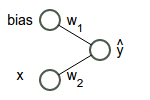

In [1]:
from IPython.display import Image
import base64
Image(data=base64.b64decode("iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAAO90lEQVR4Xu2dT5Dc1J3Hv+YQT8VJZUhVdprLWs4FTSrGGv4ql9CuHBCH4GaTFCLZwnIcjOAy8l6Q/1SlU4XHcg6xJgtY2OOik2KxSGoTGWrXzYFC2T2MDAtWitRavmQ0e9k2SYGowom4hNRPtqA9TE+rW3/cPfPepcfup6f3fu/Tv9/T+/PVpo8//vhjsMQsULAFNjGwCrYoKy6xAAOLgVCKBRhYpZiVFcrAYgyUYgEGVilmZYUysBgDpViAgVWKWVmhDCzGQCkWGEuwrly5gtf++zW887/vYOn/lnD5T5cT40x9ZQrb/nEbxDtFiHeI2LJlSylGY4X2t8BYgUVAvfzqy3i5/TI+vPLhmq37wpYv4AHpATxw3wMMsP4cFJ5jbMAiqA4eOYg/Lv8xMcL26e34+vTXk8+vbv1q8n/03TsX38EfLv4h+aRE380dmmNwFY7O2gWOBVgE1Y/2/yjxUls+vwXaY1oS7tZK3v94MJ8zceUvV0Dea+H4AoOrQrhGHqxuT0Xjp0P7D2HqH6Yymejyu5dx5PiRZBxGnmt+bj7TdSxTfgv0ASuAzglwmyE8pfbZu3VaEDkDdT+AweevzGolvPjvL+LMb84knmr+yHxmqNKyCK7ZQ7OJ5yIo+3m6clqx8UrNB1bso2W64FQN9cnijdcdAvNAQWGRPBcLicX3Ua8S84FVcj3PnjuLhRcWkgH63OG5XHc7+NTBZEBP47NvffNbucpiF/e3QCaw2g0NfNvES5c+wtQ9u2G0LCj8BLAiFEaeBU0zYJ9fxkfYjKl7FZgtCzIHIA7QUmXov/g9LmMztt6rwLBMyFROj3TkZ0fgveXh4X96GN//zvf7t2aNHGlI7VlW0pYmRC+AKUwAsQu5thOuvIjQEjGBGJ7CQYptdOw6etc6VzXXzcUZwJrGseWt2P28DV2I4OgyDgQKFgMTYtQ1xqq10eDuR6j8Fi1NxGTkwpAfRos7h05bQscQIFgibEeHMBHCVhs4EBtY8lQQd6ulvbN78e6f302mC7Z/bXsuo9NkKk1X9PZ+IUyeR0sN4GscYl8DPzOP5VuPYynQwMU+dL4O3wzRbpQQ93O1bvQuzgRWS0p/tQA6Nuqcilq7A5u3Px28T7qw7BB1VUHqhEKTB2+pCAIVHZVD3dPgujpE6peOBzesQRS5nr/+b//g24nF7JN27qkCGq/J++RknHXm5JlVeiKGr/MQPQMdV0ZkCRBbNUwEMYzQhRyZEHgHOv29ynPM6HXtja1Rf7B4AZ7RgZv+SuMAOj+NtrYEX3avfyqMfDi2DdcLEAQBvPOX8MGtR3Ex0MEFJiRxP373wWZsvaeBhixDVRrg1/jxlwEWPV3ap+xVrR57Cjgpht2xEDV4mLIFvqkiaoUwwzp4U4Hv9/awN7YrR+vuGcAS4ZsdtKV0VNEFVqMLrIkWJGEPPP4hKA0RgiCAc1XsdJQErGQ2Ig7hOQ5sx4Hz0u+wvHX2akjtMWCpNhQCiCicq+AcCx1Fh9B2IegcNN6B4Teg1z0EeknzKqPFRe7a9AeLm4ajXvzUoJEDqUahMESrKxSqbQHbDBGLoXUNlBiuUsNOT8fFQEVsNdHmdOjStTgSGOCnLTQuBDBosLxKqnTwntw/glPnoHMS4E6iFVjgbBGcwUGMPAjtawP73GZf/wVkAutYtAvPezYUPoKjipBdGZ5vQOgavGteHbfsiXD09TZUIUbg6JD3vITlrU/iYthErPOYaQk44ZhocDF8U0HDqsEOHfQaC7/2X68lyzJVTjd0WiJu2XMem++7+tAxSd52+hguTe3GYtjq6V3XPyqDtbA/WLyAtqRg0rHhLceo3avCsk0kjqd7uoEL0FJkaC/9Hh/gS9ixS0dTCaDKHVidNhoTNN2gQP/FedAmly/t2IWm2YK2xswqDbj3antzz5oToD/915/i5smbcdo8vfaDQGiC37YfEyeW4KtcMu2g1HbCrp9Dx5Fw3ZCw04ZSb0Jse6CsLH1qgZFfK0znn+hpznzKHGpJRzus4YJ/AX/78G94ofUC7r777pwMxAhdE6pyAK8u78CJJZ+BtcKiIw8Wea0DTx34ZCH5oHYwM1y0TjhnziXbaWgB+4cP/RCPPfYYtm/fjpMnT+Kmm24aDrDYhdpoQdAbaMtNSB4Da6UhRx4sqnB3SCTPNbtvtu9iMoU/Wg5Kt9p0h8DTp09j3759ePrpp/H4448PB1fylOtC5jTUGVifseFYgJXClXou+jcN6Gk2nj7JG1Gi7TG0Hkiz7OlGP/ru6OGjq46rnnjiCSwuLibe66677hocMAZWT5uNDVgpXGfbZ5OtybQNZq1EE6G0NXmXtGvNwbrv+4n3uu222wYPjwys9QFW2goKjbQ4Tdth6CAFeSpK5J3oQMUwhynS8PjMM89AVdVs3ouBtb7Aytbrw+WiMZfnednCIwOLgTUIZml43LFjB5577rnhnx4Huek6yztWY6yqbb+wsJBMTwwUHquu5Ijej4GVoWMoPJ4/fz7xXkM9PWa4x3rLwsDK2KMXLlxIvBeFR5qe2LRpU8YrN2Y2BtaA/U7hkaYnnn322exPjwPeYz1kZ2AN2YtpeCTvdeeddw5Zyvq9jIGVo28pPJL3ok2NLDxeb0gGVg6w0kvT8HjixIlkHJY1lauaE8GRangwsvD/noKqt+kzsLJSkCEfzdi/8cYbifdaKzxWoppDmxJ5FT54NH06YZShAQVmYWAVaEwqKg2PMzMzyfTEyqfHqlRzAoOH6OqwJnXoNQeBSWcjq0sMrJJsferUqSQsdofHylRzYg8aLyG0QtiTOvhGhFZglyKD0Mt8DKySwEqLpfD45ptvYn5+Hr/+z19/sukwj2pOP72vyJXBy4BNME340Pg6AiNAu8IDkQysksGi4t9++2189wffxee++DkIO4TcqjlrSw504Eg81FobYetq+KOwKDgagjVOnRdtBgZW0RZdpbw0BL73/nv4yZM/6bv7tVeVxkk1h4FVAVgbUTWHgVUBWGUcvCVV6EP/cuiztQ9NCNsMiIshrPSIeaK3oUNIlXQqaDMDqwIjlyEV0Fv6MoQlbENT/FTIhWSXOF2AF5jocei8cCswsAo36WcLLEPchO7yyr+9smrt6TQ3geQmcgcd2CQbIHoIDKGyuSwG1joEi06oU+jj3RAWR2HQgFiiTuxqJmRgVQBWGaGQDo78/OjPe9T+qpfSeBeeqIM3JPip4k8F7aVbMLAqMHSlg/dr7YkcCZxWg1Jz0G5UL7/EwKoArBuhmoNEbupBvPrRDhxf8qFVLFrCwKoArFQi4P3o/VwTpCmgdBi3r2oOIrQbNdwfGljytZ46r2U1n4FVlmW7yn3rrbfwvX/+XrKkMyPM5FLNIS2KbCrSNI8loKX48G6AxhIDq2SwaIcDgWWaJn71H78qRDWnlxbF1aaQxJILj6TRjRhm0L4hYrwMrJLAos1+BBXtyaLty5SKVs1Zverx1RB4dhIPPe/CVioeXF2rFAOrYLDIOxFQd9xxRwLVytSt90XfFaGaU3ATCimOgVWIGa8WkoY9AorA6pUIrqJVcwpsRiFFMbAKMONqYS9LsWWo5mS5bxV5GFg5rExhj8ZPdHBitbCXo+ixv5SBNWQXpmGPvNXtt98+ZCnr9zIG1oB9O2zYG/A2Y5+dgZWxC1nYy2goNt2Q3VA0jqIDESzsZbcZ81hr2CoNe/T56KOPZrcqy8m2zazGAAt7+X8ZzGOtsCELe/mhohLGEqwyVFpY2CsGqLSUsQKrDJUWFvaKBWrswCpDpYWFvXKgKiYUxh5U/huwhd8idBqYRARX4bHTldd8Le8gTSpapYWWX0is47qnveTdi02I6aFOejlAbSdcOT2fF8NTOEixDTqnV6Uk0CC2GpW8hYTCyFXA72yj8XoAAzoE+nsxgNnrZc8DtL7bU9HJlDwqLY9855FkbY8ktS3LWlGLECbPo6UG8DUOsa+Bn5nH8q3HsRRo4GISL6vDN0O0e70SdoB2rfeshYBF71Juyzzu90TcF59FIC8WJvSVvgiT9nnPH5nP/K7CtOPonYWzh2aTF2Fu+usmvPjLF3us7cXwdR6iZ6DjyogsAWKrhokghhG6kCMTAu9Ap7+r1l0cQwoLAote4+ugwT+IsxO78XrQKkTkqzsEkqeily8Nk0il5cfHfowv3/xlLBxf6Pk2sNhTwEkx7I6FqMHDlC3wTRVRK4QZ1sGbCnxfrfxgwjBtvtHXFAZW7OsQZo7hEm7Fkxf8nm+mH6TBlau0RG00OBWcY6Gj6BDaLgSdDn46MPwG9Hr15/MGsdco5S0GrDiAIU7D5M/AgIo9gY6Lng4+5wi3jIOea59wieCQzgEnAe4kWoEFzhbBGRzEyIPQDmBWpaoxSpQMUZdCwCLh1OlmDWcCBzJsSNzDiIyL8LR8Ur1lHE2nPeZzh+d6mooENW7Zcx6b7zuHTlvCJB1Nnz6GS1O7sUhKxDl/LEP00Vhekh8sUjThNUyYAdxr59dCSwSvAWbg5Xq7exkqLfRO6TMnz/TurNAEv20/Jk4swaf2xC6U2k7Y9XPoOBIm6crYh6UoaLodABOoSU3YlpLbQ48lQT0qnR+sEq1RBlj0dGmfsnPVOtB51IMmfEdGLQ7RkkSYkps8VbJ01QIjDdaNCIVZwOi4DnxOgsRRXIzhazwakY3gmphsljLWe56RBqv6wfvg3R0HFqS6CcHxC5kQHrwGo3nFSIN1Q1RaBuinyDchSyYmDRcthWPLPF22G2mwuo+k55kgHUylJRtZoa1A0kI0bAdGPRnSszQuYFE90yUdepoznzKHWtLRDmsglZY8cHZTE7UVCGqEpmtDScZZLK20wEh7LKpst9YBKQUf1A5mhovWCefMuU9eM9JbWnEQMAIY/DQOXLr+mqmHXkfIdj18YpSRByuFa6+2F1f+cgXkuWb3zfZdN6Twt/DCQuKpsgmVDQIXy9vPAmMB1krPRf9eryot/TpsXL4fG7BSuNa7Ssu4gNOvnmMFVtqY9azS0q/DxuX7sQRrXIy7kevJwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3Ixf9d0NIelzdt4X5AAAAAElFTkSuQmCC"))

## Bắt đầu

Hãy đi qua từng bước để có thể hiểu được chính xác chúng ta sẽ áp dụng TensorFlow như thế nào trong ví dụ này. Chúng ta sẽ bắt đầu với việc sinh dữ liệu, sau đó chúng ta sẽ xem hình dạng của đồ thị tính toán để thêm các phép toán vào đồ thị tính toán, cuối cùng là thực thi đồ thị tính toán vừa xây dựng.

## Dữ liệu

Toy dataset được sinh ra với 50 điểm dữ liệu có tọa độ (x, y). Đầu tiên, dữ liệu được sinh ra hoàn toàn tuyến tính:

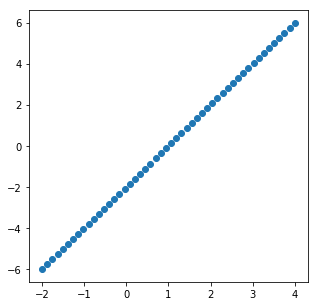

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#@test {"output": "ignore"}
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
plt.figure(figsize=(5,5))
plt.scatter(X[0], X[1])
plt.show()

Sau đó, chúng ta trộn dữ liệu trên với các điểm dữ liệu nhiễu:

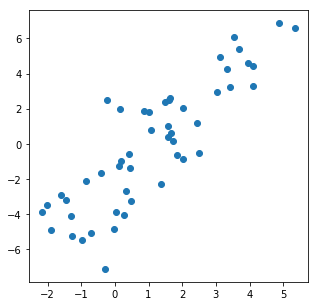

In [2]:
#@test {"output": "ignore"}
X += np.random.randn(2, num_examples)
plt.figure(figsize=(5,5))
plt.scatter(X[0], X[1])
plt.show()

## Mục tiêu cần phải đạt được là gì ?

Mục tiêu chúng ta cần đạt được là tìm ra $w_1$ và $w_2$ để biểu diễn đường thẳng màu xanh lá như bên dưới:

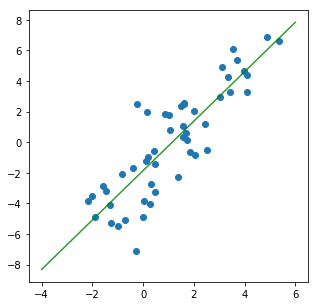

In [3]:
#@test {"output": "ignore"}
weights = np.polyfit(X[0], X[1], 1)
plt.figure(figsize=(5,5))
plt.scatter(X[0], X[1])
line_x_range = (-4, 6)
plt.plot(line_x_range, [weights[1] + a * weights[0] for a in line_x_range], "g", alpha=0.8)
plt.show()

Hãy nhớ là neural network của chúng ta được biểu diễn như bên dưới:

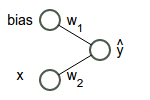

In [5]:
from IPython.display import Image
import base64
Image(data=base64.b64decode("iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAAO90lEQVR4Xu2dT5Dc1J3Hv+YQT8VJZUhVdprLWs4FTSrGGv4ql9CuHBCH4GaTFCLZwnIcjOAy8l6Q/1SlU4XHcg6xJgtY2OOik2KxSGoTGWrXzYFC2T2MDAtWitRavmQ0e9k2SYGowom4hNRPtqA9TE+rW3/cPfPepcfup6f3fu/Tv9/T+/PVpo8//vhjsMQsULAFNjGwCrYoKy6xAAOLgVCKBRhYpZiVFcrAYgyUYgEGVilmZYUysBgDpViAgVWKWVmhDCzGQCkWGEuwrly5gtf++zW887/vYOn/lnD5T5cT40x9ZQrb/nEbxDtFiHeI2LJlSylGY4X2t8BYgUVAvfzqy3i5/TI+vPLhmq37wpYv4AHpATxw3wMMsP4cFJ5jbMAiqA4eOYg/Lv8xMcL26e34+vTXk8+vbv1q8n/03TsX38EfLv4h+aRE380dmmNwFY7O2gWOBVgE1Y/2/yjxUls+vwXaY1oS7tZK3v94MJ8zceUvV0Dea+H4AoOrQrhGHqxuT0Xjp0P7D2HqH6Yymejyu5dx5PiRZBxGnmt+bj7TdSxTfgv0ASuAzglwmyE8pfbZu3VaEDkDdT+AweevzGolvPjvL+LMb84knmr+yHxmqNKyCK7ZQ7OJ5yIo+3m6clqx8UrNB1bso2W64FQN9cnijdcdAvNAQWGRPBcLicX3Ua8S84FVcj3PnjuLhRcWkgH63OG5XHc7+NTBZEBP47NvffNbucpiF/e3QCaw2g0NfNvES5c+wtQ9u2G0LCj8BLAiFEaeBU0zYJ9fxkfYjKl7FZgtCzIHIA7QUmXov/g9LmMztt6rwLBMyFROj3TkZ0fgveXh4X96GN//zvf7t2aNHGlI7VlW0pYmRC+AKUwAsQu5thOuvIjQEjGBGJ7CQYptdOw6etc6VzXXzcUZwJrGseWt2P28DV2I4OgyDgQKFgMTYtQ1xqq10eDuR6j8Fi1NxGTkwpAfRos7h05bQscQIFgibEeHMBHCVhs4EBtY8lQQd6ulvbN78e6f302mC7Z/bXsuo9NkKk1X9PZ+IUyeR0sN4GscYl8DPzOP5VuPYynQwMU+dL4O3wzRbpQQ93O1bvQuzgRWS0p/tQA6Nuqcilq7A5u3Px28T7qw7BB1VUHqhEKTB2+pCAIVHZVD3dPgujpE6peOBzesQRS5nr/+b//g24nF7JN27qkCGq/J++RknHXm5JlVeiKGr/MQPQMdV0ZkCRBbNUwEMYzQhRyZEHgHOv29ynPM6HXtja1Rf7B4AZ7RgZv+SuMAOj+NtrYEX3avfyqMfDi2DdcLEAQBvPOX8MGtR3Ex0MEFJiRxP373wWZsvaeBhixDVRrg1/jxlwEWPV3ap+xVrR57Cjgpht2xEDV4mLIFvqkiaoUwwzp4U4Hv9/awN7YrR+vuGcAS4ZsdtKV0VNEFVqMLrIkWJGEPPP4hKA0RgiCAc1XsdJQErGQ2Ig7hOQ5sx4Hz0u+wvHX2akjtMWCpNhQCiCicq+AcCx1Fh9B2IegcNN6B4Teg1z0EeknzKqPFRe7a9AeLm4ajXvzUoJEDqUahMESrKxSqbQHbDBGLoXUNlBiuUsNOT8fFQEVsNdHmdOjStTgSGOCnLTQuBDBosLxKqnTwntw/glPnoHMS4E6iFVjgbBGcwUGMPAjtawP73GZf/wVkAutYtAvPezYUPoKjipBdGZ5vQOgavGteHbfsiXD09TZUIUbg6JD3vITlrU/iYthErPOYaQk44ZhocDF8U0HDqsEOHfQaC7/2X68lyzJVTjd0WiJu2XMem++7+tAxSd52+hguTe3GYtjq6V3XPyqDtbA/WLyAtqRg0rHhLceo3avCsk0kjqd7uoEL0FJkaC/9Hh/gS9ixS0dTCaDKHVidNhoTNN2gQP/FedAmly/t2IWm2YK2xswqDbj3antzz5oToD/915/i5smbcdo8vfaDQGiC37YfEyeW4KtcMu2g1HbCrp9Dx5Fw3ZCw04ZSb0Jse6CsLH1qgZFfK0znn+hpznzKHGpJRzus4YJ/AX/78G94ofUC7r777pwMxAhdE6pyAK8u78CJJZ+BtcKiIw8Wea0DTx34ZCH5oHYwM1y0TjhnziXbaWgB+4cP/RCPPfYYtm/fjpMnT+Kmm24aDrDYhdpoQdAbaMtNSB4Da6UhRx4sqnB3SCTPNbtvtu9iMoU/Wg5Kt9p0h8DTp09j3759ePrpp/H4448PB1fylOtC5jTUGVifseFYgJXClXou+jcN6Gk2nj7JG1Gi7TG0Hkiz7OlGP/ru6OGjq46rnnjiCSwuLibe66677hocMAZWT5uNDVgpXGfbZ5OtybQNZq1EE6G0NXmXtGvNwbrv+4n3uu222wYPjwys9QFW2goKjbQ4Tdth6CAFeSpK5J3oQMUwhynS8PjMM89AVdVs3ouBtb7Aytbrw+WiMZfnednCIwOLgTUIZml43LFjB5577rnhnx4Huek6yztWY6yqbb+wsJBMTwwUHquu5Ijej4GVoWMoPJ4/fz7xXkM9PWa4x3rLwsDK2KMXLlxIvBeFR5qe2LRpU8YrN2Y2BtaA/U7hkaYnnn322exPjwPeYz1kZ2AN2YtpeCTvdeeddw5Zyvq9jIGVo28pPJL3ok2NLDxeb0gGVg6w0kvT8HjixIlkHJY1lauaE8GRangwsvD/noKqt+kzsLJSkCEfzdi/8cYbifdaKzxWoppDmxJ5FT54NH06YZShAQVmYWAVaEwqKg2PMzMzyfTEyqfHqlRzAoOH6OqwJnXoNQeBSWcjq0sMrJJsferUqSQsdofHylRzYg8aLyG0QtiTOvhGhFZglyKD0Mt8DKySwEqLpfD45ptvYn5+Hr/+z19/sukwj2pOP72vyJXBy4BNME340Pg6AiNAu8IDkQysksGi4t9++2189wffxee++DkIO4TcqjlrSw504Eg81FobYetq+KOwKDgagjVOnRdtBgZW0RZdpbw0BL73/nv4yZM/6bv7tVeVxkk1h4FVAVgbUTWHgVUBWGUcvCVV6EP/cuiztQ9NCNsMiIshrPSIeaK3oUNIlXQqaDMDqwIjlyEV0Fv6MoQlbENT/FTIhWSXOF2AF5jocei8cCswsAo36WcLLEPchO7yyr+9smrt6TQ3geQmcgcd2CQbIHoIDKGyuSwG1joEi06oU+jj3RAWR2HQgFiiTuxqJmRgVQBWGaGQDo78/OjPe9T+qpfSeBeeqIM3JPip4k8F7aVbMLAqMHSlg/dr7YkcCZxWg1Jz0G5UL7/EwKoArBuhmoNEbupBvPrRDhxf8qFVLFrCwKoArFQi4P3o/VwTpCmgdBi3r2oOIrQbNdwfGljytZ46r2U1n4FVlmW7yn3rrbfwvX/+XrKkMyPM5FLNIS2KbCrSNI8loKX48G6AxhIDq2SwaIcDgWWaJn71H78qRDWnlxbF1aaQxJILj6TRjRhm0L4hYrwMrJLAos1+BBXtyaLty5SKVs1Zverx1RB4dhIPPe/CVioeXF2rFAOrYLDIOxFQd9xxRwLVytSt90XfFaGaU3ATCimOgVWIGa8WkoY9AorA6pUIrqJVcwpsRiFFMbAKMONqYS9LsWWo5mS5bxV5GFg5rExhj8ZPdHBitbCXo+ixv5SBNWQXpmGPvNXtt98+ZCnr9zIG1oB9O2zYG/A2Y5+dgZWxC1nYy2goNt2Q3VA0jqIDESzsZbcZ81hr2CoNe/T56KOPZrcqy8m2zazGAAt7+X8ZzGOtsCELe/mhohLGEqwyVFpY2CsGqLSUsQKrDJUWFvaKBWrswCpDpYWFvXKgKiYUxh5U/huwhd8idBqYRARX4bHTldd8Le8gTSpapYWWX0is47qnveTdi02I6aFOejlAbSdcOT2fF8NTOEixDTqnV6Uk0CC2GpW8hYTCyFXA72yj8XoAAzoE+nsxgNnrZc8DtL7bU9HJlDwqLY9855FkbY8ktS3LWlGLECbPo6UG8DUOsa+Bn5nH8q3HsRRo4GISL6vDN0O0e70SdoB2rfeshYBF71Juyzzu90TcF59FIC8WJvSVvgiT9nnPH5nP/K7CtOPonYWzh2aTF2Fu+usmvPjLF3us7cXwdR6iZ6DjyogsAWKrhokghhG6kCMTAu9Ap7+r1l0cQwoLAote4+ugwT+IsxO78XrQKkTkqzsEkqeily8Nk0il5cfHfowv3/xlLBxf6Pk2sNhTwEkx7I6FqMHDlC3wTRVRK4QZ1sGbCnxfrfxgwjBtvtHXFAZW7OsQZo7hEm7Fkxf8nm+mH6TBlau0RG00OBWcY6Gj6BDaLgSdDn46MPwG9Hr15/MGsdco5S0GrDiAIU7D5M/AgIo9gY6Lng4+5wi3jIOea59wieCQzgEnAe4kWoEFzhbBGRzEyIPQDmBWpaoxSpQMUZdCwCLh1OlmDWcCBzJsSNzDiIyL8LR8Ur1lHE2nPeZzh+d6mooENW7Zcx6b7zuHTlvCJB1Nnz6GS1O7sUhKxDl/LEP00Vhekh8sUjThNUyYAdxr59dCSwSvAWbg5Xq7exkqLfRO6TMnz/TurNAEv20/Jk4swaf2xC6U2k7Y9XPoOBIm6crYh6UoaLodABOoSU3YlpLbQ48lQT0qnR+sEq1RBlj0dGmfsnPVOtB51IMmfEdGLQ7RkkSYkps8VbJ01QIjDdaNCIVZwOi4DnxOgsRRXIzhazwakY3gmphsljLWe56RBqv6wfvg3R0HFqS6CcHxC5kQHrwGo3nFSIN1Q1RaBuinyDchSyYmDRcthWPLPF22G2mwuo+k55kgHUylJRtZoa1A0kI0bAdGPRnSszQuYFE90yUdepoznzKHWtLRDmsglZY8cHZTE7UVCGqEpmtDScZZLK20wEh7LKpst9YBKQUf1A5mhovWCefMuU9eM9JbWnEQMAIY/DQOXLr+mqmHXkfIdj18YpSRByuFa6+2F1f+cgXkuWb3zfZdN6Twt/DCQuKpsgmVDQIXy9vPAmMB1krPRf9eryot/TpsXL4fG7BSuNa7Ssu4gNOvnmMFVtqY9azS0q/DxuX7sQRrXIy7kevJwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3Ixf9d0NIelzdt4X5AAAAAElFTkSuQmCC"))

Đồ thị tính toán trên tương đương với $\hat{y} = w_2 x + w_1$. Nhiệm vụ của chúng ta làm tìm ra giá trị tối ưu của $w_1$ và $w_2$. Điều đó sẽ cho chúng ta kết quả là đường hồi quy màu xanh lá ở trên.

Vậy thế nào là giá trị $w$ tốt nhất ? Đó là những trọng số mà thể hiện được độ sai khác nhỏ nhất giữa các giá trị chúng ta ước lượng $\hat{y}$ và giá trị thật sự y. Cụ thể, chúng ta mong muốn cực tiểu hóa tổng của bình phương lỗi giữa các điểm (Sum of the Squared Errors). Vì vậy, cần tìm min của $\sum{(\hat{y} - y)^2}$, đây chính là *hàm mất mát L2 (L2 loss)*. Tóm lại, giá trị trọng số tốt nhất là trọng số được cực tiểu hóa trong hàm mất mát L2 (L2 loss).

## Gradient descent là gì ? 

Trong Machine Learning nói riêng và Toán Tối Ưu nói chung, chúng ta thường xuyên phải tìm giá trị nhỏ nhất (hoặc đôi khi là lớn nhất) của một hàm số nào đó. Ví dụ như các hàm mất mát trong hai bài Linear Regression mà chúng ta đang giải quyết. Nhìn chung, việc tìm global minimum của các hàm mất mát trong Machine Learning là rất phức tạp, thậm chí là bất khả thi. Thay vào đó, người ta thường cố gắng tìm các điểm local minimum, và ở một mức độ nào đó, coi đó là nghiệm cần tìm của bài toán.

Các điểm local minimum là nghiệm của phương trình đạo hàm bằng 0. Giả sử ta có thể tìm được toàn bộ (hữu hạn) các điểm cực tiểu, ta chỉ cần thay từng điểm local minimum đó vào hàm số rồi tìm điểm làm cho hàm có giá trị nhỏ nhất. Tuy nhiên, trong hầu hết các trường hợp, việc giải phương trình đạo hàm bằng 0 là bất khả thi. Nguyên nhân có thể đến từ sự phức tạp của dạng của đạo hàm, từ việc các điểm dữ liệu có số chiều lớn, hoặc từ việc có quá nhiều điểm dữ liệu.

Hướng tiếp cận phổ biến nhất là xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0. Gradient Descent (viết gọn là GD) và các biến thể của nó là một trong những phương pháp được dùng nhiều nhất.

## Sử dụng GD giải bài toán Linear regression

GD sẽ bắt đầu với một giá trị trọng số $w$ ngẫu nhiên cho $\hat{y} = w_2 x + w_1$ và dần dần di chuyển những trọng số đến những giá trị tốt hơn. 

Với mỗi trọng số khác nhau ta có thể tính toán ra được một giá trị lỗi. Do đó, từ bất kì một trọng số nào ta có, GD sẽ di chuyển theo hướng sẽ làm tăng lỗi (lên dốc) hoặc theo hướng làm giảm lỗi (xuống dốc). Và dĩ nhiên, chúng ta luôn mong muốn GD di chuyển về phía có lỗi thấp hơn.

Câu hỏi đặt ra là: "Làm thể nào để GD biết cách "xuống dốc" hay đi theo phía có lỗi thấp hơn ? Câu trả lời là: GD sẽ theo hàm mất mát L2 và đạo hàm sẽ là công cụ chỉ cho ta con đường đi, hướng đi.

## Giải bài toán Linear regression với GD

Với những ý tưởng trên, chúng ta bắt đầu tìm $w$ thỏa những yêu cầu bằng cách sử dụng TensorFlow:

In [5]:
import tensorflow as tf 

# Split into x and y
x, y = X
# Add the bias node which always has a value of 1
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)

# Keep track of the loss at each iteration so we can chart it later
losses = []
# How many iterations to run our training
training_steps = 50
# The learning rate. Also known has the step size. This changes how far
# we move down the gradient toward lower error at each step. Too large
# jumps risk inaccuracy, too small slow the learning.
learning_rate = 0.001

# In TensorFlow, we need to run everything in the context of a session.
with tf.Session() as sess:
    # Set up all the tensors.
    # Our input layer is the x value and the bias node.
    input = tf.constant(x_with_bias)
    # Our target is the y values. They need to be massaged to the right shape.
    target = tf.constant(np.transpose([y]).astype(np.float32))
    # Weights are a variable. They change every time through the loop.
    # Weights are initialized to random values (gaussian, mean 0, stdev 0.1)
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    # Initialize all the variables defined above.
    tf.initialize_all_variables().run()
  
    # Set up all operations that will run in the loop.
    # For all x values, generate our estimate on all y given our current
    # weights. So, this is computing y = w2 * x + w1 * bias
    yhat = tf.matmul(input, weights)
    # Compute the error, which is just the difference between our 
    # estimate of y and what y actually is.
    yerror = tf.subtract(yhat, target)
    # We are going to minimize the L2 loss. The L2 loss is the sum of the
    # squared error for all our estimates of y. This penalizes large errors
    # a lot, but small errors only a little.
    loss = tf.nn.l2_loss(yerror)

    # Perform gradient descent. 
    # This essentially just updates weights, like weights += grads * learning_rate
    # using the partial derivative of the loss with respect to the
    # weights. It's the direction we want to go to move toward lower error.
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # At this point, we've defined all our tensors and run our initialization
    # operations. We've also set up the operations that will repeatedly be run
    # inside the training loop. All the training loop is going to do is 
    # repeatedly call run, inducing the gradient descent operation, which has the effect of
    # repeatedly changing weights by a small amount in the direction (the
    # partial derivative or gradient) that will reduce the error (the L2 loss).
    for _ in range(training_steps):
        # Repeatedly run the operations, updating the TensorFlow variable.
        sess.run(update_weights)

        # Here, we're keeping a history of the losses to plot later
        # so we can see the change in loss as training progresses.
        losses.append(loss.eval())
        
        print('Step = {}, Loss = {}'.format(_, loss.eval()))

    # Training is done, get the final values for the charts
    betas = weights.eval()
    yhat = yhat.eval()

Step = 0, Loss = 222.85546875
Step = 1, Loss = 185.9169158935547
Step = 2, Loss = 163.68943786621094
Step = 3, Loss = 149.7346649169922
Step = 4, Loss = 140.4761505126953
Step = 5, Loss = 133.9241180419922
Step = 6, Loss = 128.96878051757812
Step = 7, Loss = 124.98845672607422
Step = 8, Loss = 121.63246154785156
Step = 9, Loss = 118.70075225830078
Step = 10, Loss = 116.07709503173828
Step = 11, Loss = 113.692138671875
Step = 12, Loss = 111.5028076171875
Step = 13, Loss = 109.48091888427734
Step = 14, Loss = 107.60685729980469
Step = 15, Loss = 105.86598205566406
Step = 16, Loss = 104.2467041015625
Step = 17, Loss = 102.73934936523438
Step = 18, Loss = 101.33551788330078
Step = 19, Loss = 100.02774810791016
Step = 20, Loss = 98.80924987792969
Step = 21, Loss = 97.67381286621094
Step = 22, Loss = 96.61575317382812
Step = 23, Loss = 95.62970733642578
Step = 24, Loss = 94.7107925415039
Step = 25, Loss = 93.85440063476562
Step = 26, Loss = 93.0562973022461
Step = 27, Loss = 92.3125076293945

Visualize kết quả:

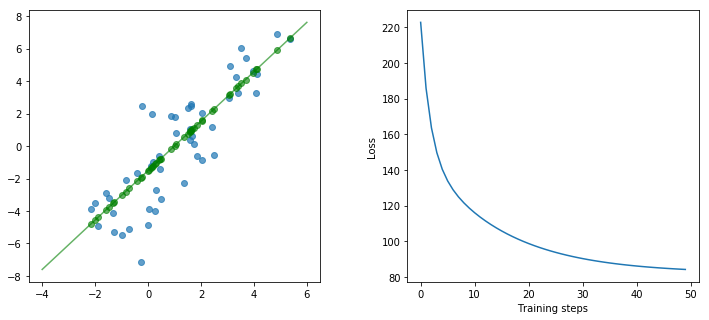

In [6]:
#@test {"output": "ignore"}
import matplotlib.pylab as pylab

# Show the results.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(12, 5)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()

Đoạn code ở trên có chú thích rất rõ ràng tại mỗi bước. Hãy đọc qua những chú thích đó để hiểu thêm về code.

Phần cốt lõi là vòng lặp, chứa lệnh `run` thực hiện các thao tác cần thiết cho việc thực thi hàm `GradientDescentOptimizer`. Điều đó bao gồm một số thao tác khác, tất cả các thao tác đó cũng được thực hiện mỗi lần thông qua vòng lặp. Thực thi `GradientDescentOptimizer` có tác dụng làm trọng số biến thay đổi tại mỗi lần lặp.

Trong mỗi lần lặp, đoạn code trên xử lý dữ liệu đầu vào, sinh ra các giá trị $\hat{y}$ của mỗi giá trị $x$ với trọng số $w_i$ và tính ra `L2 loss` = $(\hat{y} - y)^2$. Sau đó thay đổi giá trị $w_i$ một lượng theo chiều làm giảm L2 loss.

Sau số hữu hạn các lần lặp, sự thay đổi của trọng số ngày càng nhỏ dần và nhỏ dần, tương tự cho hàm mất mát cũng nhỏ dẫn và nhỏ dần, khi ta thu hẹp các giá trị trọng số đến gần giá trị tối ưu nhất. Kết thúc vòng lặp, ta có thu được giá trị nhỏ nhất có thể có của hàm mất mát L2 và gần nhất với giá trị trọng số tối ưu mà ta có thể có.

### Tham khảo
* [Gradient descent](https://machinelearningcoban.com/2017/01/12/gradientdescent/)
* [An overview of gradient descent optimization algorithms](http://ruder.io/optimizing-gradient-descent/)

---
Nếu có thắc mắc hoặc góp ý, các bạn hãy comment bên dưới để bài viết có thể được hoàn thiện hơn. 
Xin cảm ơn,

Hà Phương - Mechasolution Việt Nam.